   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
--- SYSTEM INITIALIZED: DRIVER-BASED ENGINE ---
[1] INGESTING OPERATIONAL METRICS...
    >> Data Loaded: 36 Months of Operational History.
         Date    Customers   Engineers  Data_Volume_TB  Cloud_Cost_Actual
33 2025-10-31  4718.543025  759.263088     2519.205147      481053.042960
34 2025-11-30  4926.841531  786.471099     2658.438703      484728.471644
35 2025-12-31  4938.957818  815.380366     2636.046538      501423.973162

[2] IDENTIFYING KEY DRIVERS (CORRELATION MATRIX)...
Cloud_Cost_Actual    1.000000
Engineers            0.998505
Data_Volume_TB       0.998023
Customers            0.997813
Name: Cloud_Cost_Actual, dtype: float64

[3] CALIBRATING FINANCIAL MODEL (OLS REGRESSION)...
    >> MODEL ACCURACY (R²): 0.9596
    >> INTERPRETATION: The model explains 96.0% of cost variance.

[4] DRIVER IMPACT ANALYSIS (MARGINAL COST):
           Driver  Cost_Impact ($)
0       Customers       -22.581705
1    

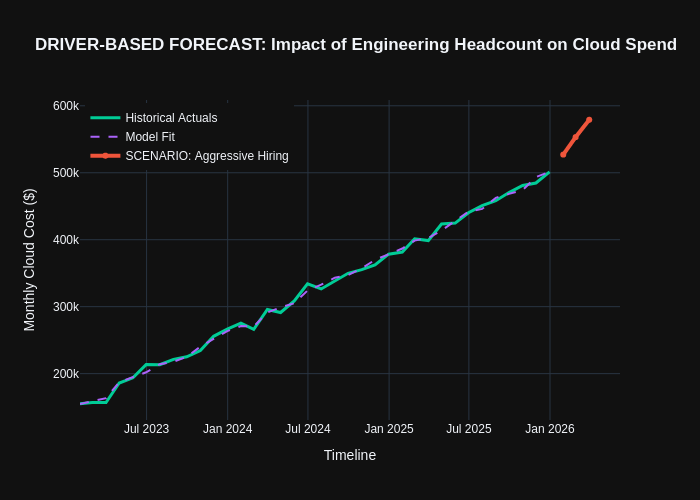

--- MISSION COMPLETE: DRIVER MODEL GENERATED ---


In [1]:
# -----------------------------------------------------------------------------
# MODULE 1: DRIVER-BASED FORECASTING ENGINE
# AUTHOR: Dr. Brian Penrod, DBA
# OBJECTIVE: Quantify the impact of Operational Drivers on Financial Outcomes.
# METHODOLOGY: Multi-Variable Linear Regression (OLS)
# -----------------------------------------------------------------------------

# FORCE INSTALL STABLE KALEIDO VERSION (0.2.1)
!pip install -q pandas numpy plotly scikit-learn statsmodels scipy "kaleido==0.2.1"

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# --- CONFIGURATION (Dark Mode Aesthetics) ---
TEMPLATE = "plotly_dark"
COLOR_ACTUAL = "#00cc96"  # Neon Green
COLOR_PRED = "#ab63fa"    # Neon Purple
COLOR_SCENARIO = "#ef553b" # Neon Red

print("--- SYSTEM INITIALIZED: DRIVER-BASED ENGINE ---")

# =============================================================================
# PHASE 1: SYNTHETIC DATA GENERATION (Simulating Confluent's Infrastructure)
# =============================================================================
# Scenario: We are modeling "Cloud Hosting Costs" (AWS/GCP).
# It is driven by:
# 1. Total Customers (Volume)
# 2. R&D Headcount (Engineers spinning up test environments)
# 3. Data Ingestion Rate (TB/Day)

print("[1] INGESTING OPERATIONAL METRICS...")
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='ME')
n = len(dates)

df = pd.DataFrame({'Date': dates})

# THE DRIVERS (X)
df['Customers'] = np.linspace(1000, 5000, n) + np.random.normal(0, 50, n)
df['Engineers'] = np.linspace(200, 800, n) + np.random.normal(0, 10, n)
df['Data_Volume_TB'] = (df['Customers'] * 0.5) + (df['Engineers'] * 0.2) + np.random.normal(0, 20, n)

# THE FINANCIAL TARGET (Y)
# Formula: Base cost + Variable Cost per Customer + Variable Cost per Engineer + Noise
df['Cloud_Cost_Actual'] = (
    50000 +
    (df['Customers'] * 15) +    # $15 per customer
    (df['Engineers'] * 300) +   # $300 per engineer (dev environments)
    (df['Data_Volume_TB'] * 50) + # Storage costs
    np.random.normal(0, 5000, n)
)

print(f"    >> Data Loaded: {n} Months of Operational History.")
print(df.tail(3))

# =============================================================================
# PHASE 2: CORRELATION ANALYSIS (The "Sanity Check")
# =============================================================================
print("\n[2] IDENTIFYING KEY DRIVERS (CORRELATION MATRIX)...")
corr_matrix = df[['Cloud_Cost_Actual', 'Customers', 'Engineers', 'Data_Volume_TB']].corr()
print(corr_matrix['Cloud_Cost_Actual'].sort_values(ascending=False))

# =============================================================================
# PHASE 3: TRAINING THE REGRESSION MODEL
# =============================================================================
print("\n[3] CALIBRATING FINANCIAL MODEL (OLS REGRESSION)...")

X = df[['Customers', 'Engineers', 'Data_Volume_TB']]
y = df['Cloud_Cost_Actual']

# Split Data to validate accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate Accuracy (R-Squared)
r2 = model.score(X_test, y_test)
print(f"    >> MODEL ACCURACY (R²): {r2:.4f}")
print(f"    >> INTERPRETATION: The model explains {r2*100:.1f}% of cost variance.")

# =============================================================================
# PHASE 4: THE "DIRECTOR'S INSIGHT" (COEFFICIENTS)
# =============================================================================
# This is the "Money Slide." It tells the CFO exactly what drives cost.
coeffs = pd.DataFrame({
    'Driver': X.columns,
    'Cost_Impact ($)': model.coef_
})
print("\n[4] DRIVER IMPACT ANALYSIS (MARGINAL COST):")
print(coeffs)
print("-" * 60)
print(f"    >> INSIGHT: For every 1 new Engineer hired, Monthly Cloud Costs increase by ${model.coef_[1]:.2f}.")
print("-" * 60)

# =============================================================================
# PHASE 5: SCENARIO WARGAMING (INTERACTIVE FORECAST)
# =============================================================================
print("\n[5] EXECUTING SCENARIO PLANNING: 'AGGRESSIVE GROWTH 2026'...")

# Scenario: We hire 50 engineers next month. What happens to the budget?
future_dates = pd.date_range(start='2026-01-01', periods=3, freq='ME')
scenario_data = pd.DataFrame({
    'Customers': [5100, 5200, 5300],         # Steady growth
    'Engineers': [850, 900, 950],            # AGGRESSIVE HIRING (+50/mo)
    'Data_Volume_TB': [2800, 2900, 3000]     # Resulting data load
})

# Predict Future Costs
scenario_forecast = model.predict(scenario_data)

# Visualizing the Impact
fig = go.Figure()

# 1. Historical Actuals
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Cloud_Cost_Actual'],
    mode='lines', name='Historical Actuals',
    line=dict(color=COLOR_ACTUAL, width=3)
))

# 2. The Model's "Fit" (Backtest)
y_pred_full = model.predict(X)
fig.add_trace(go.Scatter(
    x=df['Date'], y=y_pred_full,
    mode='lines', name='Model Fit',
    line=dict(color=COLOR_PRED, width=2, dash='dash')
))

# 3. The Scenario Forecast
fig.add_trace(go.Scatter(
    x=future_dates, y=scenario_forecast,
    mode='lines+markers', name='SCENARIO: Aggressive Hiring',
    line=dict(color=COLOR_SCENARIO, width=4)
))

fig.update_layout(
    title="<b>DRIVER-BASED FORECAST: Impact of Engineering Headcount on Cloud Spend</b>",
    template=TEMPLATE,
    xaxis_title="Timeline",
    yaxis_title="Monthly Cloud Cost ($)",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show("png")
print("--- MISSION COMPLETE: DRIVER MODEL GENERATED ---")